In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [9]:
EJ_DATA = "../Data/EJ Index/Input/GreaterCDMX_AggregatedIndex.shp"
BUS_ROUTES = "../Data/Bus Routes/Projected"
OUTPUT = "../Data/EJ Index/Route Data/"

In [12]:
city_data = gpd.read_file(EJ_DATA)
city_data.crs = {'init': 'epsg:4326', 'no_defs': True}
city_data = city_data.to_crs("EPSG:32614")

C:\Users\rahej\.conda\envs\machinelearning\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [13]:
bus_route_files = []
for e in os.listdir(BUS_ROUTES):
    if ".shp" in e:
        bus_route_files.append(e)

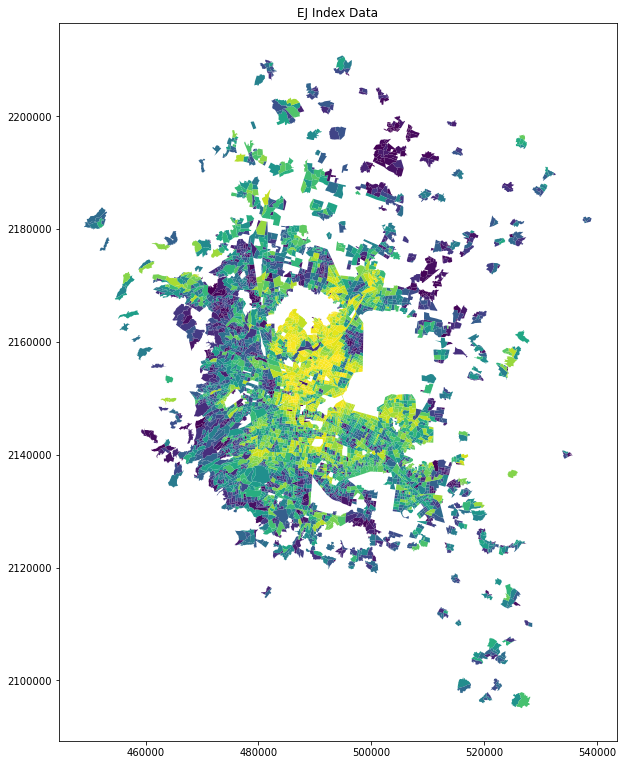

In [16]:
fig, ax = plt.subplots(figsize = (10,15))
ax.set_title('EJ Index Data')
city_data.plot(ax=ax, column = 'Index_CS_6')

In [18]:
for file in tqdm(bus_route_files):
    path = os.path.join(BUS_ROUTES,file)
    df = gpd.read_file(path)

    df_buffered = df.copy()
    buffered_geom = [e.buffer(5) for e in df['geometry']]
    df_buffered['geometry'] = buffered_geom
    result = gpd.overlay(df_buffered,city_data,how='intersection')

    result.to_file(os.path.join(OUTPUT,file))

100%|██████████████████████████| 109/109 [10:30<00:00,  5.78s/it]


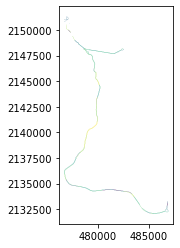

In [20]:
result.plot(column = 'Index_CS_6')

(array([17.,  6., 10., 23., 28., 37., 36., 21., 37., 24.]),
 array([1.93911000e-04, 9.37172773e-02, 1.87240644e-01, 2.80764010e-01,
        3.74287376e-01, 4.67810742e-01, 5.61334109e-01, 6.54857475e-01,
        7.48380841e-01, 8.41904208e-01, 9.35427574e-01]),
 <a list of 10 Patch objects>)

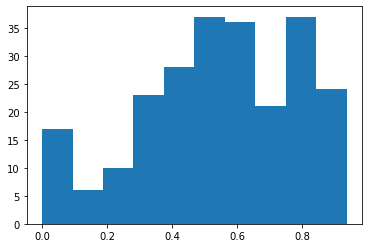

In [21]:
plt.hist(result['Index_CS_6'])